# Random Forest Classification Model

Using data for the business LendingCompany.com from 2007-2010, a company who connects lenders with borrows online, in order to predict whether not a borrower will pay them back based on the variables we have in the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Checking current directory to access files
import os

In [3]:
os.getcwd()

'C:\\Users\\Craig.Hinman\\Python Lessons\\ML Topics'

In [39]:
# Getting the data
loans = pd.read_csv("loan_data.csv")

In [5]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


# Why Random Forest?

Because of the linear relationships seen and other charateristics that risk customers have we can use random forest. This method is better than a decision tree model in most cases because it produces many "trees" and the best (most "voted" outcome from all the trees produced in the forest) result is chosen mitigating traps like overfitting in the process

In general RF Modeling can have higher accuracy and reduce the affects of outliers

loans.describe()

In [7]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# EDA

Creating a visual to compare FICO scores of customers who meet underwriting conditions (are low risk and can be trusted to pay off the debt) with credit.policy = 1 vs those that don't credit.policy = 0

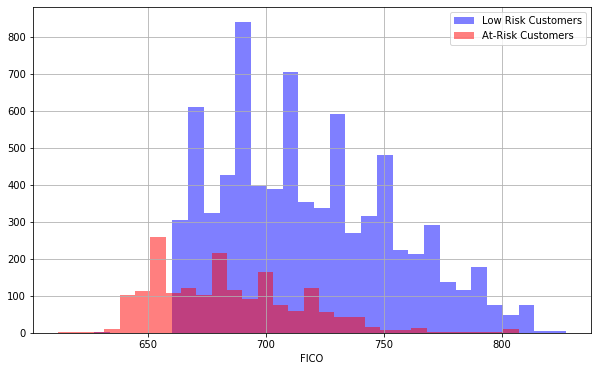

In [12]:
# Always want to set the figure size
plt.figure(figsize=(10, 6))

# Historgram of FICO scores of low risk customers (alpha for transparency, blue color, bins 30, putting a label)
loans[loans["credit.policy"]==1]["fico"].hist(alpha=.5, color="blue", bins=30, label="Low Risk Customers")

# The same for at risk customers
loans[loans["credit.policy"]==0]["fico"].hist(alpha=.5, color="red", bins=30, label="At-Risk Customers")

plt.legend()
plt.xlabel("FICO")
plt.show()

Another Histogram showing the distribution of customers who have/have not fully paid the company back

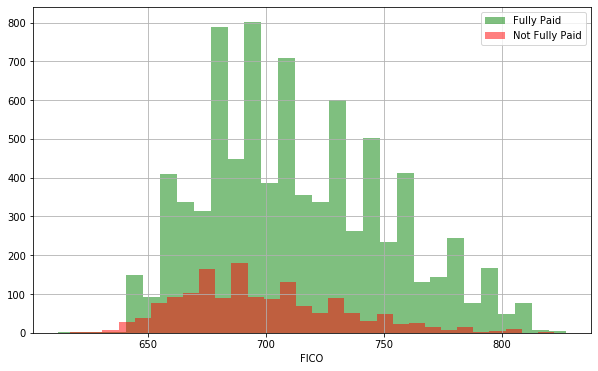

In [22]:
plt.figure(figsize=(10, 6))

loans[loans["not.fully.paid"]==0]["fico"].hist(alpha=.5, color="green", bins=30, label="Fully Paid")
loans[loans["not.fully.paid"]==1]["fico"].hist(alpha=.5, color="red", bins=30, label="Not Fully Paid")


plt.legend()
plt.xlabel("FICO")
plt.show()

Looking at the count of each of the different loan purposes

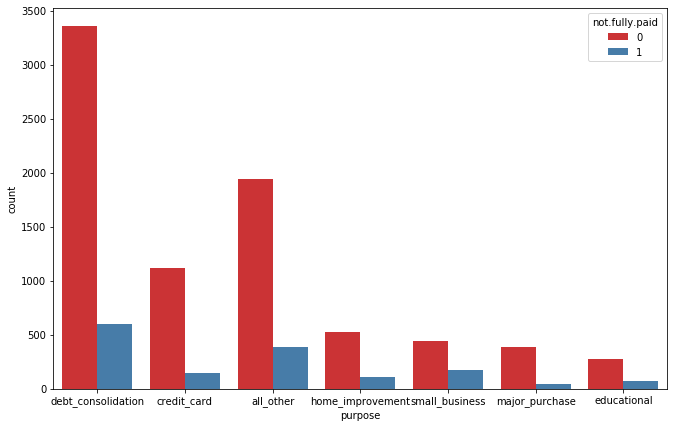

In [18]:
plt.figure(figsize=(11,7))
sns.countplot(x="purpose", hue="not.fully.paid", data=loans, palette="Set1")

There are more instances of people who have fully paid for each loan purpose. Most loans given out through the website are for debt consolidation (loan to pay other loans)

Looking into the trend between FICO score and interest rates given out

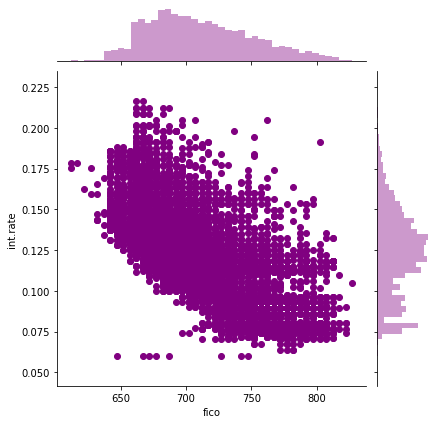

In [19]:
# Joint plots can let us see the trend plus the distribution for each variable at the same time
sns.jointplot(x='fico', y='int.rate', data=loans, color='purple')

Here we can observe the distributions of interest rates given to customers (most between 12.5% and 15.0%) and FICO scores (most around 680 or 690). We can also see the trend of higher FICO scores receiving lower rates as expected since the score indicates how reliable a customer is at paying off their debt

Now we want to see any differences between the low risk (policy = 1) vs at-risk (policy=0) customers and the interest rates they are dealt based on their FICO scores

<Figure size 792x504 with 0 Axes>

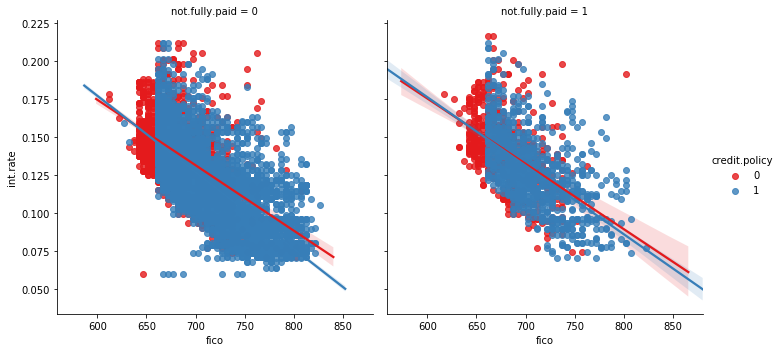

In [20]:
# We can use lmplot to plot graphs side by side
plt.figure(figsize=(11,7))
sns.lmplot(x='fico', y='int.rate', data=loans, hue='credit.policy',
           col='not.fully.paid', palette='Set1')

We can see a distinct cut off from low risk customers (meeting underwriting conditions) at the FICO score ~660. The data is showing in customers that have fully paid, the at-risk customers have a trend line that is less steep. This is showing what we would expect. At-risk customers receiving higher interest rates. Also noticing an outlier with FICO of 650 receiving one of the lowest rates.

When looking at customers that have not fully paid and their FICO scores the relationship with the interest rates they received behave shows almost the same negative relationship (trend lines in both are almost identical)

# Setting up data

In [25]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Currently the purpose column is categorical. Computers need help understanding what we're meaning so the df needs to be changed. To make this data more useful we would rather have the values be appended to the table. Then have a binary 0/1 indicator if the loan was for the respective purpose. This is called making "dummy variables"

In [42]:
cat_feats = ['purpose']
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)
final_data.head()

# Drop_first = True - removed the "all other" column which is probably not needed for the modeling work being done up ahead

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# Train & Test

Data needs to be split into test and train sets. A train set is used to train our model on how it will predict borrowers who will pay/not pay. A test set will be where we test the model to see how accurate its predictions are

In [43]:
# Using sklearn for the split
from sklearn.model_selection import train_test_split

In [46]:
X = final_data.drop("not.fully.paid", axis=1) # axis = 1 drops the column not the index (defining independent vars)
y = final_data["not.fully.paid"] # this is defining our target (dependent) variable whether the person will be someone to pay or not

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)

"Test_size" means our test data is 30% of the data 70/30 or 80/20 is common. "random_state" is splitting (shuffling) the data by indexed into test/train randomly. The value is a seed that allows the results to be reproduced. For creating the model you want this in but when productionalizing you'd want to remove I'm assuming?

# The first decision tree

Going to compare the results from one decision tree vs random forest

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dtree = DecisionTreeClassifier()

In [49]:
# Fitting the tree to the train data so that we can use the tree to predict later
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Want to see what the decision tree looks like

In [57]:
from sklearn import tree

In [68]:
my_tree = dtree.fit(X_train, y_train)

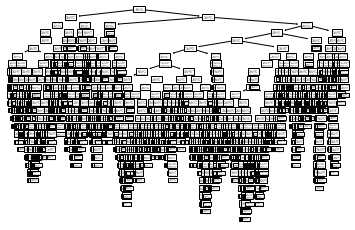

In [70]:
tree.plot_tree(my_tree)
plt.gcf().set_size_inches(1, 1)
plt.show()

# plt.savefig('Craig.Hinman/Python Lessons/ML Topics/tree.png')

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

# Cross validation should be brought up here but we're not getting into that stuff yet

# Creating a prediction from the test set 
pred = dtree.predict(X_test) # predicting pay/not pay based on the tree model we trained last step
print(classification_report(y_test, pred)) # Comparing the actual results to what was predicted


# Not paid = 1 / Paid = 0

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.72      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.72      0.74      2874



I believe this means that the model predicted people that did pay (0) at 85% accuracy and didn't (1) 19% accuracy with an overall accuracy of 72%

In [51]:
print(confusion_matrix(y_test, pred)) # Rows are actuals and columns are predictions

# Probably looks like this
#                     Prediction
#                0(Will) 1(Won't)
# Actual
#    0(Will)     TP       FN
#    1(Won't)    FP       TN

[[1978  453]
 [ 340  103]]


Probably looks like this
                    Prediction
               0(Will) 1(Won't)
Actual
   0(Will)     TP       FN
   1(Won't)    FP       TN

# Training the Random Forest

Now we have trained a tree with our data now we want to train the RF Model to compare the two

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc = RandomForestClassifier(n_estimators=600) # n_estimators means we're looking at 600 decisions trees

Typical values for the number of trees is 10, 30 or 100. In general the more trees you have the more accurate. There is a point where the cost of computation and benefits from having a lot of trees is not worth it (aim to have just as many as you need?). I think in only very few practical cases more than 300 trees outweights the cost of learning them (except maybe for really huge datasets). The course material uses 600 here.

In [73]:
# Fitting the model to the train set
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
# Prediction of paid/not paid on the 
pred_rfc = rfc.predict(X_test)

# Classification report comparing our predictions to the test data
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



I believe this means that the model predicted people that did pay (0) at 85% accuracy and didn't (1) 50% accuracy with an overall accuracy of 85%. The results from the RF predicted the people that didn't pay 30% more accurately and overall 13% more accurately

In [75]:
# Confustion matrix
print(confusion_matrix(y_test, pred_rfc))

[[2423    8]
 [ 435    8]]


Probably looks like this
                    Prediction
               0(Will) 1(Won't)
Actual
   0(Will)     TP       FN
   1(Won't)    FP       TN

The RF model looks like it was more accurate at predicting, but the decision tree seems like the better model since RF is predicting almost exclusively that everyone will pay

So it seems there are more variables that need to be considered, maybe there needs to be some cross validation, or possibly another model to describe the data